In [26]:
# Remove unwanted warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data extraction and management
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols

# Feature Engineering
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.cluster import KMeans
from sklearn import metrics
from kneed import KneeLocator

# Cointegration and Statistics
from statsmodels.tsa.stattools import coint
import statsmodels.api as sm

# Reporting visualization
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [27]:
data = pd.read_csv("close.csv")
#data.dropna(inplace=True)
#data = data.interpolate()
data

,DOT/USD,USDC/USD,MATIC/USD,SOL/USD,USDT/USD,ETH/USD,TRX/USD,BTC/USD,LTC/USD,AVAX/USD,...,LINK/USD,ALGO/USD,BCH/USD,XTZ/USD,AAVE/USD,GRT/USD,MKR/USD,CRV/USD,YFI/USD,SUSHI/USD
0,4.493950,0.999875,0.0185,1.8036,1.002700,733.650,0.0731,29676.7900,126.07000,102.13,...,11.76600,0.446,343.0100,0.701151,276.67,0.6092,589.3935,0.494044,28925.75,8.359
1,4.486105,1.000650,0.0192,1.9576,1.000400,786.880,0.0760,33769.5200,137.41000,119.70,...,12.02560,0.419,359.5000,0.704370,253.86,0.5705,650.7619,0.502285,21906.22,7.933
2,4.480150,1.000500,0.0213,2.3033,1.002300,1086.860,0.0732,32908.0200,165.00000,136.47,...,15.25000,0.450,442.0300,0.698450,262.49,0.5749,722.8778,0.496565,25241.82,9.298
3,4.413965,1.000500,0.0240,2.1059,1.000400,991.400,0.0717,30441.5700,147.78000,134.75,...,13.23040,0.408,393.2500,0.692315,249.72,0.5447,663.8816,0.470925,23274.71,8.111
4,4.403000,1.000465,0.0284,2.0000,1.002900,1105.560,0.0717,35063.0000,161.47000,134.15,...,14.41150,0.462,424.4800,0.694850,220.05,0.4919,784.3956,0.472825,24131.11,8.225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,NaN,NaN,NaN,NaN,0.998608,3357.048,NaN,60784.5915,75.18075,NaN,...,14.16200,NaN,373.5700,NaN,NaN,NaN,2484.3390,NaN,NaN,NaN
1279,NaN,NaN,NaN,NaN,0.999150,3235.855,NaN,58930.8390,70.67265,NaN,...,13.34750,NaN,362.9835,NaN,NaN,NaN,2306.2735,NaN,NaN,NaN
1280,NaN,NaN,NaN,NaN,0.999861,2865.912,NaN,53899.8305,59.28000,NaN,...,11.50350,NaN,305.2145,NaN,NaN,NaN,2045.2380,NaN,NaN,NaN
1281,NaN,NaN,NaN,NaN,0.999950,2962.750,NaN,56089.2080,61.55650,NaN,...,12.25975,NaN,320.3455,NaN,NaN,NaN,2234.0510,NaN,NaN,NaN


In [28]:
nan_counts = data.isna().sum()
print("Her sütundaki NaN değer sayısı:\n", nan_counts)

Her sütundaki NaN değer sayısı:
 DOT/USD       959
USDC/USD      961
MATIC/USD     379
SOL/USD       368
USDT/USD        0
ETH/USD         0
TRX/USD       951
BTC/USD         0
LTC/USD         0
AVAX/USD      321
SHIB/USD      802
DOGE/USD        0
UNI/USD         0
NEAR/USD     1018
LINK/USD        0
ALGO/USD      388
BCH/USD         0
XTZ/USD       959
AAVE/USD      195
GRT/USD       195
MKR/USD         0
CRV/USD       959
YFI/USD       335
SUSHI/USD     203
dtype: int64


In [29]:
data.drop(columns=['DOT/USD','USDC/USD','TRX/USD','SHIB/USD','NEAR/USD','XTZ/USD','CRV/USD'], inplace=True)
data = data.interpolate()
data

,MATIC/USD,SOL/USD,USDT/USD,ETH/USD,BTC/USD,LTC/USD,AVAX/USD,DOGE/USD,UNI/USD,LINK/USD,ALGO/USD,BCH/USD,AAVE/USD,GRT/USD,MKR/USD,YFI/USD,SUSHI/USD
0,0.01850,1.8036,1.002700,733.650,29676.7900,126.07000,102.130,0.007300,4.86060,11.76600,0.4460,343.0100,276.670,0.609200,589.3935,28925.7500,8.359000
1,0.01920,1.9576,1.000400,786.880,33769.5200,137.41000,119.700,0.012100,4.77350,12.02560,0.4190,359.5000,253.860,0.570500,650.7619,21906.2200,7.933000
2,0.02130,2.3033,1.002300,1086.860,32908.0200,165.00000,136.470,0.010100,5.95610,15.25000,0.4500,442.0300,262.490,0.574900,722.8778,25241.8200,9.298000
3,0.02400,2.1059,1.000400,991.400,30441.5700,147.78000,134.750,0.009100,5.28700,13.23040,0.4080,393.2500,249.720,0.544700,663.8816,23274.7100,8.111000
4,0.02840,2.0000,1.002900,1105.560,35063.0000,161.47000,134.150,0.010400,6.20960,14.41150,0.4620,424.4800,220.050,0.491900,784.3956,24131.1100,8.225000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,0.68267,20.1715,0.998608,3357.048,60784.5915,75.18075,26.607,0.121480,8.81670,14.16200,0.1155,373.5700,81.424,0.182283,2484.3390,6053.8995,0.674188
1279,0.68267,20.1715,0.999150,3235.855,58930.8390,70.67265,26.607,0.115040,8.27145,13.34750,0.1155,362.9835,81.424,0.182283,2306.2735,6053.8995,0.674188
1280,0.68267,20.1715,0.999861,2865.912,53899.8305,59.28000,26.607,0.096440,7.08261,11.50350,0.1155,305.2145,81.424,0.182283,2045.2380,6053.8995,0.674188
1281,0.68267,20.1715,0.999950,2962.750,56089.2080,61.55650,26.607,0.105799,7.68935,12.25975,0.1155,320.3455,81.424,0.182283,2234.0510,6053.8995,0.674188


In [30]:
# Create DataFrame with Returns and Volatility information
df_returns = pd.DataFrame(data.pct_change().mean() * 255, columns=["Returns"])
df_returns["Volatility"] = data.pct_change().std() * np.sqrt(255)
df_returns.head()

,Returns,Volatility
MATIC/USD,1.301470,1.129325
SOL/USD,0.933762,0.963910
USDT/USD,-0.000339,0.017340
ETH/USD,0.514766,0.684531
BTC/USD,0.274846,0.535203


In [31]:
# Scale Features
scaler = StandardScaler()
scaler = scaler.fit_transform(df_returns)
scaled_data = pd.DataFrame(scaler, columns=df_returns.columns, index=df_returns.index)
df_scaled = scaled_data
df_scaled.head()

,Returns,Volatility
MATIC/USD,1.770412,0.561258
SOL/USD,1.036231,0.189925
USDT/USD,-0.828836,-1.934996
ETH/USD,0.199644,-0.437244
BTC/USD,-0.279390,-0.772464


In [32]:
# Find the optimum number of clusters
X = df_scaled.copy()
K = range(1, 15)
distortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    
kl = KneeLocator(K, distortions, curve="convex", direction="decreasing")
c = kl.elbow
print("Optimum Clusters: ", c)

Optimum Clusters:  4


In [33]:
# Fit K-Means Model
k_means = KMeans(n_clusters=c)
k_means.fit(X)
prediction = k_means.predict(df_scaled)

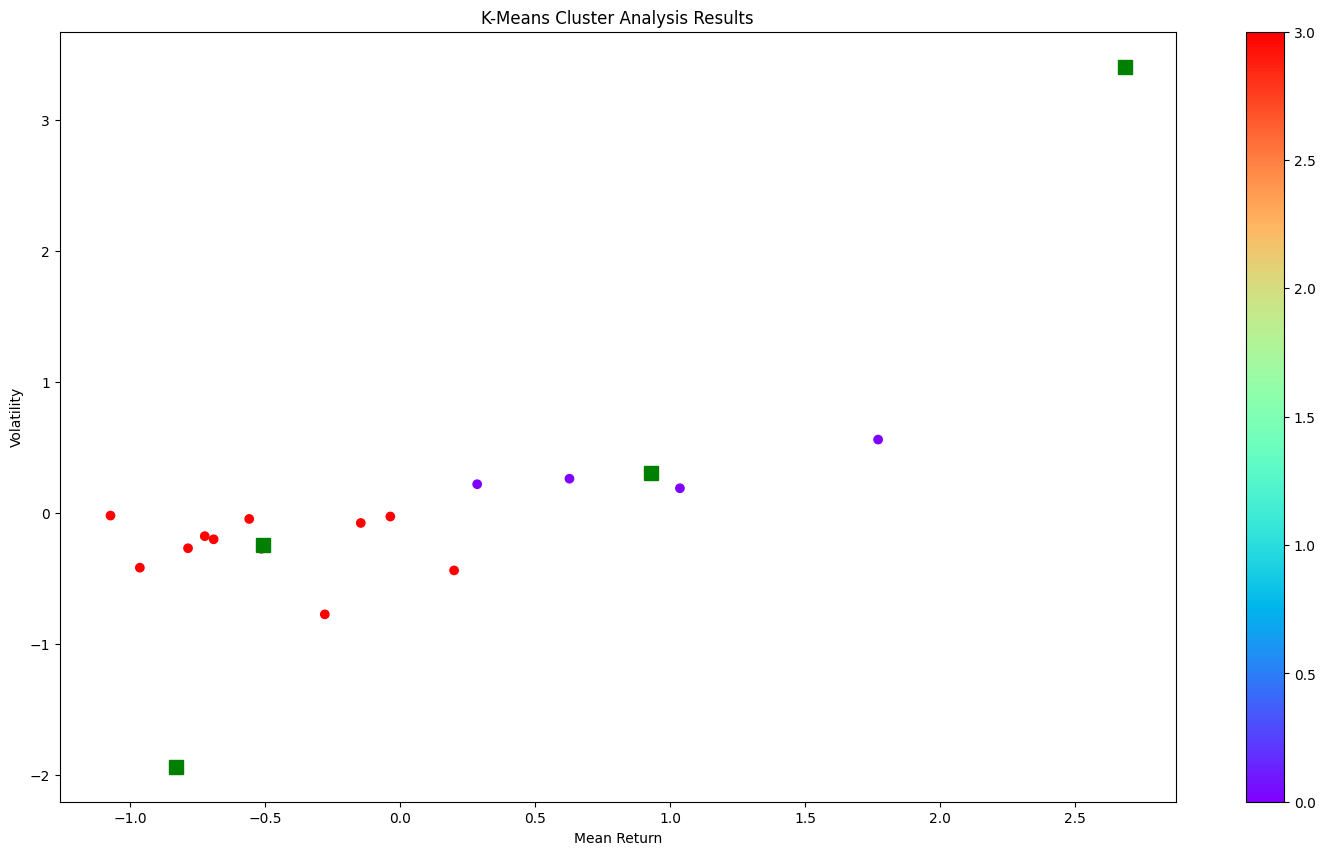

In [34]:
# Show Results
centroids = k_means.cluster_centers_
fig = plt.figure(figsize = (18, 10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=k_means.labels_, cmap="rainbow", label=X.index)
ax.set_title("K-Means Cluster Analysis Results")
ax.set_xlabel("Mean Return")
ax.set_ylabel("Volatility")
plt.colorbar(scatter)
plt.plot(centroids[:,0], centroids[:,1], "sg", markersize=10)
plt.show()

In [35]:
# Return the series
clustered_series = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series = clustered_series[clustered_series != -1]
clustered_series[:5]

MATIC/USD    0
SOL/USD      0
USDT/USD     2
ETH/USD      3
BTC/USD      3
dtype: int32

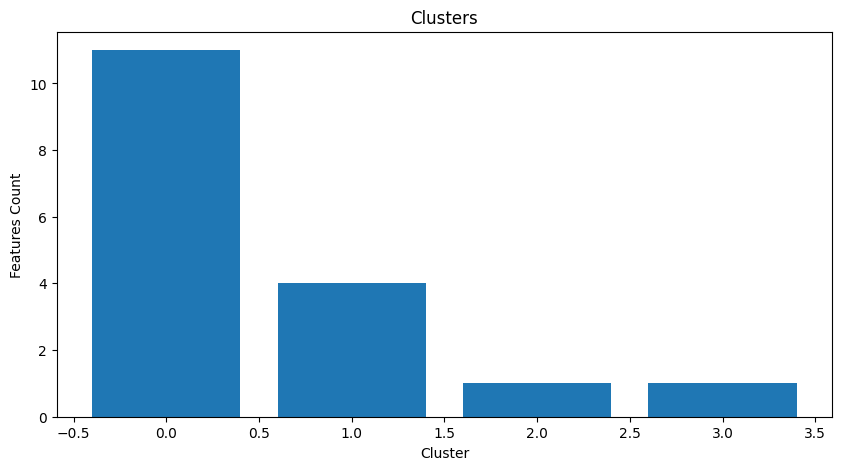

In [36]:
# View number by cluster
plt.figure(figsize=(10, 5))
plt.bar(range(len(clustered_series.value_counts())), clustered_series.value_counts())
plt.title("Clusters")
plt.xlabel("Cluster")
plt.ylabel("Features Count")
plt.show()

In [37]:
def calculate_cointegration(series_1, series_2):
    coint_res = coint(series_1, series_2)
    coint_t = coint_res[0]
    p_value = coint_res[1]
    critical_value = coint_res[2][1]  # Using 5% critical value
    model = sm.OLS(series_1, sm.add_constant(series_2)).fit()
    hedge_ratio = model.params[1]
    coint_flag = 1 if p_value < 0.05 and coint_t < critical_value else 0
    return coint_flag, coint_t, p_value, hedge_ratio

In [38]:
# Loop through and calculate cointegrated pairs
# Allow 10 - 30 mins for calculation 
tested_pairs = []
cointegrated_pairs = []

# Option to load existing cointegrated pairs
load_coint_pairs = False

if not load_coint_pairs:
    for base_asset in clustered_series.index:
        base_label = clustered_series[base_asset]
        
        for compare_asset in clustered_series.index:
            compare_label = clustered_series[compare_asset]
            
            test_pair = base_asset + compare_asset
            test_pair = ''.join(sorted(test_pair))
            is_tested = test_pair in tested_pairs
            tested_pairs.append(test_pair)
            
            if compare_asset != base_asset and base_label == compare_label and not is_tested:
                
                series_1 = data[base_asset].values.astype(float)
                series_2 = data[compare_asset].values.astype(float)
                coint_flag, coint_t, p_value, hedge_ratio = calculate_cointegration(series_1, series_2)
                
                if coint_flag == 1:
                    cointegrated_pairs.append({
                        "base_asset": base_asset, 
                        "compare_asset": compare_asset, 
                        "label": base_label,
                        "coint_t": coint_t,
                        "p_value": p_value,
                        "hedge_ratio": hedge_ratio
                    })
                    
    df_coint = pd.DataFrame(cointegrated_pairs)
    df_coint = df_coint.sort_values(by=["coint_t", "p_value"], ascending=[True, True])

In [39]:
df_coint.head(10)
# DataFrame'i CSV dosyasına dönüştür ve kaydet
df_coint.to_csv('cointegrated_pairs.csv', index=False)

In [40]:
# Plot price comparison for any given assets
currency_1 = "GRT/USD"
currency_2 = "SUSHI/USD"

# Varlık değerlerini al
asset_1_close = data[currency_1]
asset_2_close = data[currency_2]

coint_flag, coint_t, p_value, hedge_ratio = calculate_cointegration(asset_1_close, asset_2_close)

print(f"Cointegration Flag: {coint_flag}")
print(f"Coint_t: {coint_t}")
print(f"P_value: {p_value}")
print(f"Hedge Ratio: {hedge_ratio}")

Cointegration Flag: 1
Coint_t: -4.327414890160924
P_value: 0.0023195945504849145
Hedge Ratio: 0.06969720180299671


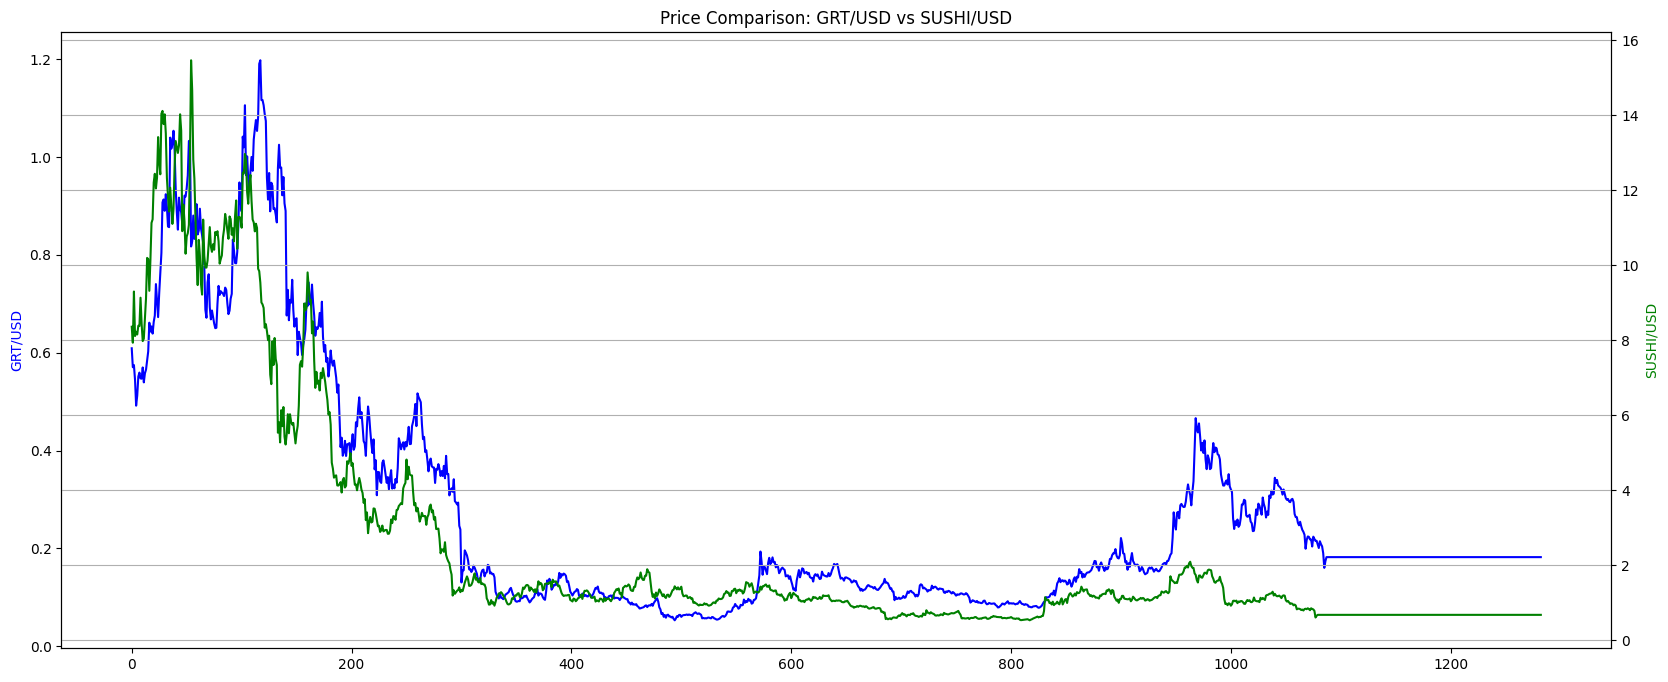

In [41]:
# Figure oluşturma
plt.figure(figsize=(20, 8))

plt.plot(asset_1_close, color='blue', label=currency_1)
plt.ylabel(currency_1, color='blue')
plt.twinx()
plt.plot(asset_2_close, color='green', label=currency_2)
plt.ylabel(currency_2, color='green')
plt.xlabel('Time')
plt.title('Price Comparison: {} vs {}'.format(currency_1, currency_2))
plt.grid(True)
plt.show()

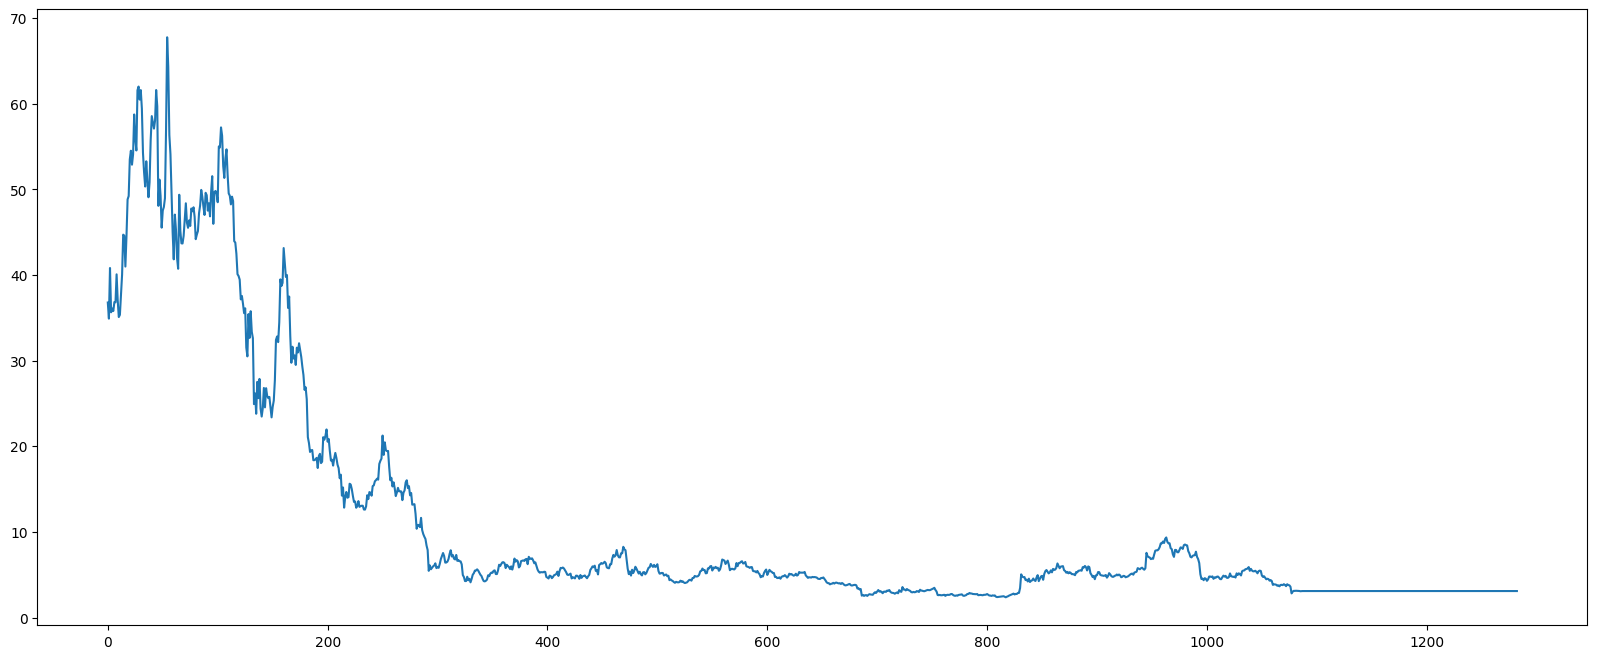

In [42]:
# Plot the Spread
series_1 = data[currency_1].values.astype(float)
series_2 = data[currency_2].values.astype(float)
coint_flag, hedge_ratio,_,_ = calculate_cointegration(series_1, series_2)
spread = series_1 - (hedge_ratio * series_2)
plt.figure(1, figsize=(20, 8))
plt.plot(spread)
plt.show()

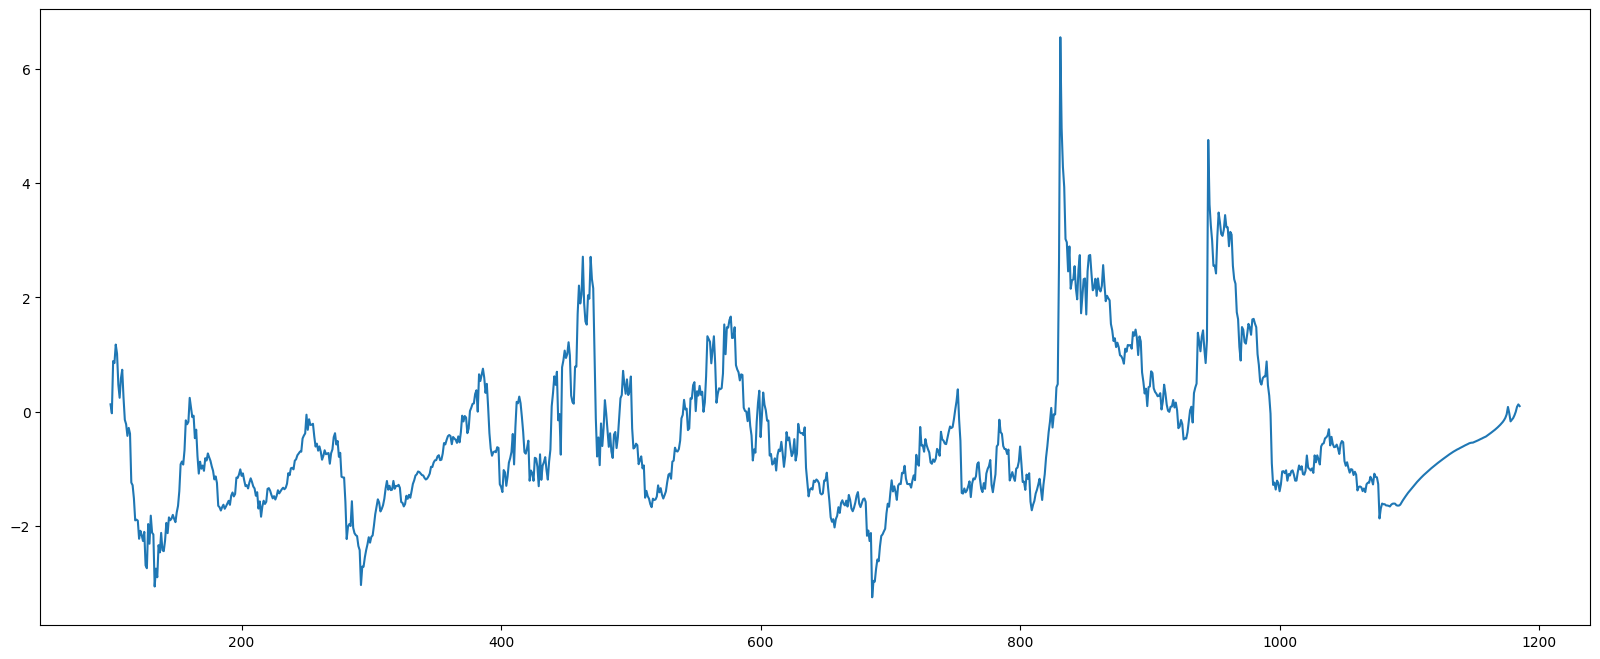

In [43]:
# Plot the ZScore
window = 100
spread_series = pd.Series(spread)
mean = spread_series.rolling(center=False, window=window).mean()
std = spread_series.rolling(center=False, window=window).std()
x = spread_series.rolling(center=False, window=1).mean()
z_score = (x - mean) / std
plt.figure(1, figsize=(20, 8))
plt.plot(z_score)
plt.show()